<a href="https://colab.research.google.com/github/GhaziFadhlullah/DIF62130_B-_25_2311532012/blob/main/Pratikum1/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Dataset

In [3]:
import pandas as pd

data = { 'luas' : [6, 8, 10, 14, 18],
        'harga' : [7, 9, 13, 17.5, 18]}

df = pd.DataFrame(data)
df


,luas,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


from matplotlib import pyplot as plt
df['luas'].plot(kind='hist', bins=20, title='luas')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['harga'].plot(kind='hist', bins=20, title='harga')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='luas', y='harga', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['luas']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'luas'}, axis=1)
              .sort_values('luas', ascending=True))
  xs = counted['luas']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('luas', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('luas')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['harga']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'harga'}, axis=1)
              .sort_values('harga', ascending=True))
  xs = counted['harga']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('harga', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('harga')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['luas'].plot(kind='line', figsize=(8, 4), title='luas')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['harga'].plot(kind='line', figsize=(8, 4), title='harga')
plt.gca().spines[['top', 'right']].set_visible(False)

penejelasan :

Visualisasi Data

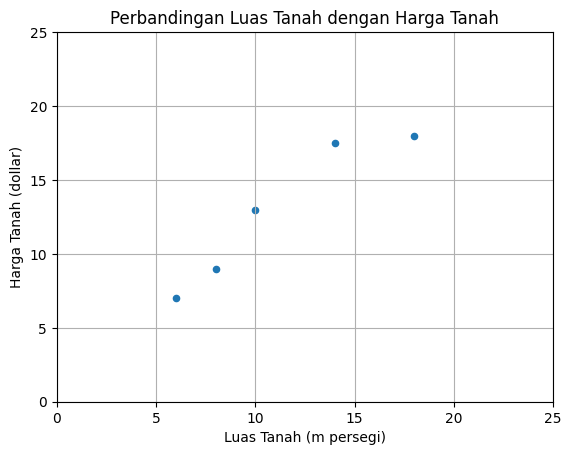

In [8]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='luas', y='harga')
plt.title('Perbandingan Luas Tanah dengan Harga Tanah')
plt.xlabel('Luas Tanah (m persegi)')
plt.ylabel('Harga Tanah (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()


2.penjelasan :

In [9]:
import numpy as np

x=np.array(df['luas'])   #Independent Variabel (features)
y=np.array(df['harga'])  #Dependent Variabel (target)

print(f'x : {x}')
print(f'y : {y}')

x : [ 6  8 10 14 18]
y : [ 7.   9.  13.  17.5 18. ]


3.penjelasan

In [20]:
x = x.reshape(-1, 1)

print(f'x shape: {x.shape}')
print(f'x : {x}')

x shape: (5, 1)
x : [[ 6]
 [ 8]
 [10]
 [14]
 [18]]


4.penjelasan

Modeling

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

5.penjelasan

In [17]:
x_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(x_vis)



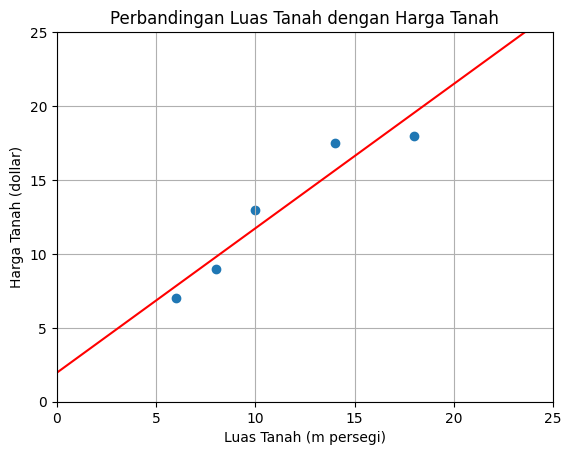

In [19]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, color='red')

plt.title('Perbandingan Luas Tanah dengan Harga Tanah')
plt.xlabel('Luas Tanah (m persegi)')
plt.ylabel('Harga Tanah (dollar)')
#plt.xlim(0, 25)
#plt.ylim(0, 25)
plt.grid(True)
plt.show()



6.penjelesan :

**Formula Linear Regression**
y = a + bx

y: respon variabel
x: explanatory variabel
a: intercept
b: slope

In [21]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : 1.965517241379315
slope : [0.9762931]


7.penjelasan :

Prediksi Harga Tanah

In [22]:
luas_tanah = np.array([12,15,20]).reshape(-1,1)
luas_tanah


array([[12],
       [15],
       [20]])

In [36]:
harga_prediksi = model.predict(luas_tanah)
harga_prediksi

array([13.68103448, 16.60991379, 21.49137931])

In [37]:
for luas, hrg in zip(luas_tanah, harga_prediksi) :
  print(f'Luas Tanah {luas}: harga prediksi: {hrg}')

Luas Tanah [12]: harga prediksi: 13.681034482758621
Luas Tanah [15]: harga prediksi: 16.609913793103445
Luas Tanah [20]: harga prediksi: 21.491379310344826


8.penjelasan :

**Evaluasi Simple Linear Regression Model**

Training & Testing Dataset

In [38]:
x_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

x_test = np.array([9, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

9.penjelasan

Training Simple Linear Regression

In [39]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

10.penjelasan

Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared
Ref :https://en.wikipedia.org/wiki/Coefficient_of_determination


In [41]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r_squared= r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6873061136400747


In [42]:
y_pred

array([10.75215517, 10.75215517, 12.70474138, 17.5862069 , 13.68103448])

11.penjelasan: